# Experiment Tracking with MLFlow (Local)

In this demo we will see how to use MLFlow for tracking experiments, using a toy data set. In the attached lab (below), you will download a larger dataset and attempt to train the best model that you can.

We should first install mlflow, and add it to the requirements.txt file if not done already.

`pip install mlflow` or `python3 -m pip install mlflow`.

You may also need to `pip install setuptools`.

From here, make sure to save this notebook in a specific folder, and ensure you run all command line commands from the same folder.

In [39]:
import os
import mlflow
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from IPython.display import Image

In [40]:
from google.oauth2 import service_account

creds_path = "/mnt/c/Users/chely/Downloads/key.json"
credentials = service_account.Credentials.from_service_account_file(creds_path)

print("✅ Authenticated as:", credentials.service_account_email)


✅ Authenticated as: mlops-accountant@mlopslab5-457005.iam.gserviceaccount.com


In [41]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/mnt/c/Users/chely/Downloads/key.json"


Running the below code will create a sqlite database and an mlruns folder in the current directory.

In [42]:
mlflow.set_tracking_uri("https://mlflow-server-152716764493.us-west2.run.app")
# mlflow.create_experiment(
#     name="lab5")
mlflow.set_experiment('lab5')

2025/04/18 10:32:09 INFO mlflow.tracking.fluent: Experiment with name 'lab5' does not exist. Creating a new experiment.


<Experiment: artifact_location='gs://freshmlopsbucket/mlruns /1', creation_time=1744997529859, experiment_id='1', last_update_time=1744997529859, lifecycle_stage='active', name='lab5', tags={}>

In [43]:
mlflow.get_tracking_uri()

'https://mlflow-server-152716764493.us-west2.run.app'


# Experiment Tracking and Model Registry Lab

## Overview

In this lab you will each download a new dataset and attempt to train a good model, and use mlflow to keep track of all of your experiments, log your metrics, artifacts and models, and then register a final set of models for "deployment", though we won't actually deploy them anywhere yet.

## Goal

Your goal is **not** to become a master at MLFlow - this is not a course on learning all of the ins and outs of MLFlow. Instead, your goal is to understand when and why it is important to track your model development process (tracking experiments, artifacts and models) and to get into the habit of doing so, and then learn at least the basics of how MLFlow helps you do this so that you can then compare with other tools that are available.

## Data

You can choose your own dataset to use here. It will be helpful to choose a dataset that is already fairly clean and easy to work with. You can even use a dataset that you've used in a previous course. We will do a lot of labs where we do different things with datasets, so if you can find one that is interesting enough for modeling, it should work for most of the rest of the course. 

There are tons of places where you can find open public datasets. Choose something that interests you, but don't overthink it.

[Kaggle Datasets](https://www.kaggle.com/datasets)  
[HuggingFace Datasets](https://huggingface.co/docs/datasets/index)  
[Dagshub Datasets](https://dagshub.com/datasets/)  
[UCI](https://archive.ics.uci.edu/ml/datasets.php)  
[Open Data on AWS](https://registry.opendata.aws/)  
[Yelp](https://www.yelp.com/dataset)  
[MovieLens](https://grouplens.org/datasets/movielens/)  
And so many more...

## Instructions

Once you have selected a set of data, create a brand new experiment in MLFlow and begin exploring your data. Do some EDA, clean up, and learn about your data. You do not need to begin tracking anything yet, but you can if you want to (e.g. you can log different versions of your data as you clean it up and do any feature engineering). Do not spend a ton of time on this part. Your goal isn't really to build a great model, so don't spend hours on feature engineering and missing data imputation and things like that.

Once your data is clean, begin training models and tracking your experiments. If you intend to use this same dataset for your final project, then start thinking about what your model might look like when you actually deploy it. For example, when you engineer new features, be sure to save the code that does this, as you will need this in the future. If your final model has 1000 complex features, you might have a difficult time deploying it later on. If your final model takes 15 minutes to train, or takes a long time to score a new batch of data, you may want to think about training a less complex model.

Now, when tracking your experiments, at a *minimum*, you should:

1. Try at least 3 different ML algorithms (e.g. linear regression, decision tree, random forest, etc.).
2. Do hyperparameter tuning for **each** algorithm.
3. Do some very basic feature selection, and repeat the above steps with these reduced sets of features.
4. Identify the top 3 best models and note these down for later.
6. Choose the **final** "best" model that you would deploy or use on future data, stage it (in MLFlow), and run it on the test set to get a final measure of performance. Don't forget to log the test set metric.
7. Be sure you logged the exact training, validation, and testing datasets for the 3 best models, as well as hyperparameter values, and the values of your metrics.  
8. Push your code to Github. No need to track the mlruns folder, the images folder, any datasets, or the sqlite database in git.

### Turning It In

In the MLFlow UI, next to the refresh button you should see three vertical dots. Click the dots and then download your experiments as a csv file. Open the csv file in Excel and highlight the rows for your top 3 models from step 4, highlight the run where you applied your best model to the test set, and then save as an excel file. Take a snapshot of the Models page in the MLFLow UI showing the model you staged in step 6 above. Submit the excel file and the snapshot to Canvas.

# Chelyah's Lab

## 1. Importing Data + EDA

In [44]:
df_health = pd.read_csv("../../data/student_mental_health.csv")
df_health.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [45]:
df_health.columns = df_health.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('?', '', regex=False)
df_health.columns

Index(['timestamp', 'choose_your_gender', 'age', 'what_is_your_course',
       'your_current_year_of_study', 'what_is_your_cgpa', 'marital_status',
       'do_you_have_depression', 'do_you_have_anxiety',
       'do_you_have_panic_attack',
       'did_you_seek_any_specialist_for_a_treatment'],
      dtype='object')

In [46]:
df_health.drop(columns="timestamp", inplace=True)
df_health.isna().sum()


choose_your_gender                             0
age                                            1
what_is_your_course                            0
your_current_year_of_study                     0
what_is_your_cgpa                              0
marital_status                                 0
do_you_have_depression                         0
do_you_have_anxiety                            0
do_you_have_panic_attack                       0
did_you_seek_any_specialist_for_a_treatment    0
dtype: int64

In [47]:
df_health = df_health.dropna(subset=['age'])
df_health.isna().sum()

choose_your_gender                             0
age                                            0
what_is_your_course                            0
your_current_year_of_study                     0
what_is_your_cgpa                              0
marital_status                                 0
do_you_have_depression                         0
do_you_have_anxiety                            0
do_you_have_panic_attack                       0
did_you_seek_any_specialist_for_a_treatment    0
dtype: int64

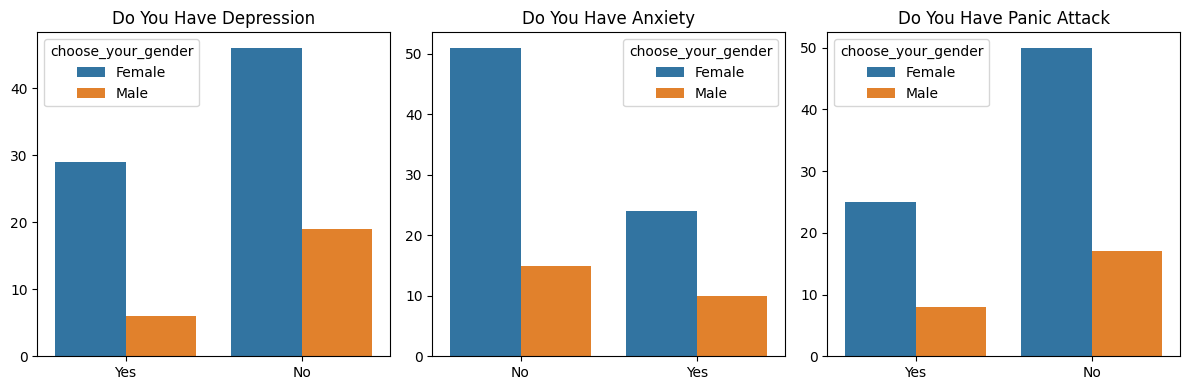

In [48]:
plt.figure(figsize=(12, 4))
for i, col in enumerate(['do_you_have_depression', 'do_you_have_anxiety', 'do_you_have_panic_attack']):
    plt.subplot(1, 3, i+1)
    sns.countplot(data=df_health, x=col, hue='choose_your_gender')
    plt.title(col.replace('_', ' ').title())
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

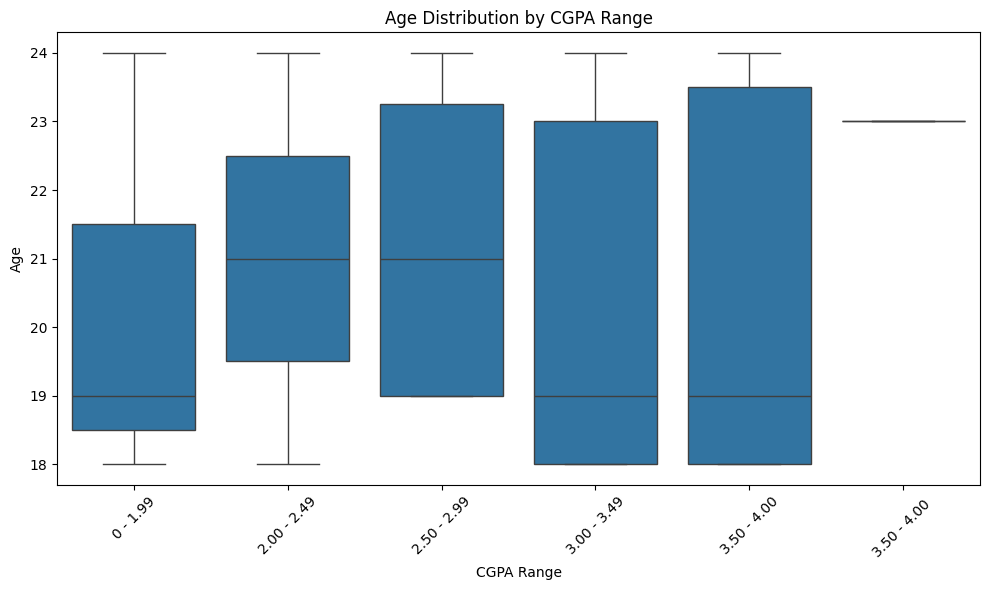

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_health, x='what_is_your_cgpa', y='age',
            order=sorted(df_health['what_is_your_cgpa'].unique()))
plt.title("Age Distribution by CGPA Range")
plt.xlabel("CGPA Range")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. Try at least 3 different ML algorithms (e.g. linear regression, decision tree, random forest, etc.) & 3. Do hyperparameter tuning for **each** algorithm.

In [50]:
mlflow.set_experiment('lab5')

<Experiment: artifact_location='gs://freshmlopsbucket/mlruns /1', creation_time=1744997529859, experiment_id='1', last_update_time=1744997529859, lifecycle_stage='active', name='lab5', tags={}>

In [51]:
df_health['target'] = df_health['do_you_have_depression'].map({'Yes': 1, 'No': 0})

In [52]:
X_new = df_health.drop(columns=['do_you_have_depression', 'target'])
X_encoded = pd.get_dummies(X_new)
y_new = df_health['target']

In [53]:
X_t, X_te, y_t, y_te = train_test_split(X_encoded, y_new, test_size=0.2)

In [54]:
artifact_dir = "artifacts_datasets"
os.makedirs(artifact_dir, exist_ok=True)

X_t.to_csv(f"{artifact_dir}/X_train.csv", index=False)
X_te.to_csv(f"{artifact_dir}/X_test.csv", index=False)
y_t.to_csv(f"{artifact_dir}/y_train.csv", index=False)
y_te.to_csv(f"{artifact_dir}/y_test.csv", index=False)

In [55]:
penalty = ['l2', None]
max_iter = [1000, 5000, 10000]

for p in penalty:
    for iters in max_iter:
        with mlflow.start_run():
            mlflow.set_tags({"Model":"logistic-regression", "Train/Test Split": "80/20", "Target": "depression"})
            mlflow.log_params({'penalty': 'None' if p is None else p, 'max_iter':iters})
            
            log = LogisticRegression(penalty=p, max_iter=iters)
            log.fit(X_t, y_t)
            acc = accuracy_score(y_te, log.predict(X_te))

            mlflow.log_metric("accuracy", acc)
mlflow.end_run()

🏃 View run illustrious-ram-467 at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1/runs/8b79fef4e2164ecda5c472361a98fcf0
🧪 View experiment at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1
🏃 View run funny-fowl-968 at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1/runs/1732f1cb1ec749988a695227605d9e28
🧪 View experiment at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1
🏃 View run welcoming-yak-687 at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1/runs/34ed36ecfdf945a79eb6479cb65d3056
🧪 View experiment at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1
🏃 View run upbeat-squirrel-806 at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1/runs/ff8c3bd3ad6f40a0b7195b906d1f1928
🧪 View experiment at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1
🏃 View run wise-zebra-117 at: https://mlflow-server-152716764493.us-west2.run.app/#

In [56]:
depths = [3, 5, 10, None]
splits = [2, 5, 10]

for depth in depths:
    for split in splits:
        with mlflow.start_run():
            mlflow.set_tags({
                "Model": "decision-tree", "Train/Test Split": "80/20", "Target": "depression"})
            mlflow.log_params({'max_depth': depth, 'min_samples_split': split})

            dt = DecisionTreeClassifier(max_depth=depth, min_samples_split=split)
            dt.fit(X_t, y_t)

            acc = accuracy_score(y_te, dt.predict(X_te))
            mlflow.log_metric('accuracy', acc)
mlflow.end_run()

🏃 View run hilarious-moose-174 at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1/runs/55c94d42de004819a8ac4b0e937e4ec3
🧪 View experiment at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1
🏃 View run valuable-moose-269 at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1/runs/34dcc15f4ed1450dbfb4d75a912ce0ab
🧪 View experiment at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1
🏃 View run upbeat-crab-181 at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1/runs/bf43370946954f15acc42155e5fe1d23
🧪 View experiment at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1
🏃 View run nebulous-shrike-799 at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1/runs/e080d9f2a2da476cac913e1b262909b7
🧪 View experiment at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1
🏃 View run handsome-sponge-423 at: https://mlflow-server-152716764493.us-west2.ru

In [57]:
ntrees = [50, 100, 200]
depths = [None, 10, 20]

for n in ntrees:
    for d in depths:
        with mlflow.start_run():
            mlflow.set_tags({"Model": "random-forest", "Train/Test Split": "80/20", "Target": "depression"})

            mlflow.log_params({'n_estimators': n,'max_depth': 'None' if d is None else d})

            rf = RandomForestClassifier(n_estimators=n, max_depth=d, oob_score=True, bootstrap=True)
            rf.fit(X_t, y_t)

            acc = rf.oob_score_
            mlflow.log_metric('accuracy', acc)
mlflow.end_run()

🏃 View run unleashed-moose-707 at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1/runs/cf75ab021ebd44e68372c5b4a4eeb3f1
🧪 View experiment at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1
🏃 View run caring-elk-399 at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1/runs/725b5bae8f1e497ca1b987162fc61467
🧪 View experiment at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1
🏃 View run sincere-eel-94 at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1/runs/ae74c7ce4ee843939250fe56bd4260f1
🧪 View experiment at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1
🏃 View run calm-boar-568 at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1/runs/4e71905571814533866a64b1c3d15267
🧪 View experiment at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1
🏃 View run respected-hen-586 at: https://mlflow-server-152716764493.us-west2.run.app/#/exper

## 4. Do some very basic feature selection, and repeat the above steps with these reduced sets of features.


In [58]:
drop_cols = [
    'what_is_your_course',  
    'marital_status',       
    'do_you_have_depression',
    'target'
]

X_man = df_health.drop(columns=drop_cols)
X_man_encoded = pd.get_dummies(X_man, drop_first=True)

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_man_encoded, df_health['target'], test_size=0.2,)

In [59]:
artifact_redir = "artifacts_datasets_reduced"
os.makedirs(artifact_redir, exist_ok=True)

X_train_red.to_csv(f"{artifact_redir}/X_train_reduced.csv", index=False)
X_test_red.to_csv(f"{artifact_redir}/X_test_reduced.csv", index=False)
y_train_red.to_csv(f"{artifact_redir}/y_train_reduced.csv", index=False)
y_test_red.to_csv(f"{artifact_redir}/y_test.csv_reduced", index=False)

In [60]:
penalty = ['l2', None]
max_iter = [1000, 5000, 10000]

for p in penalty:
    for iters in max_iter:
        with mlflow.start_run():
            mlflow.set_tags({"Model":"logistic-regression", "Train/Test Split": "80/20", "Target": "depression", "Reduced Features": True})
            mlflow.log_params({'penalty': 'None' if p is None else p, 'max_iter':iters})
            
            log = LogisticRegression(penalty=p, max_iter=iters)
            log.fit(X_train_red, y_train_red)
            acc = accuracy_score(y_test_red, log.predict(X_test_red))

            mlflow.log_metric("accuracy", acc)
mlflow.end_run()

🏃 View run adventurous-mare-920 at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1/runs/e8b3ea5292f043fb9aa7466654b4ac41
🧪 View experiment at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1
🏃 View run wistful-ray-780 at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1/runs/65e0c07945ba42ed983f76a683ae2e51
🧪 View experiment at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1
🏃 View run skittish-hen-583 at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1/runs/278bb2f17cbb4101afc8320b8b9492b3
🧪 View experiment at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1
🏃 View run casual-perch-644 at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1/runs/0218a2307d4744e098b5eabe46f36041
🧪 View experiment at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1
🏃 View run rogue-mouse-24 at: https://mlflow-server-152716764493.us-west2.run.app/#/e

In [61]:
depths = [3, 5, 10, None]
splits = [2, 5, 10]

for depth in depths:
    for split in splits:
        with mlflow.start_run():
            mlflow.set_tags({
                "Model": "decision-tree", "Train/Test Split": "80/20", "Target": "depression", "Reduced Features": True})
            mlflow.log_params({'max_depth': depth, 'min_samples_split': split})

            dt = DecisionTreeClassifier(max_depth=depth, min_samples_split=split)
            dt.fit(X_train_red, y_train_red)

            acc = accuracy_score(y_test_red, dt.predict(X_test_red))
            mlflow.log_metric('accuracy', acc)
            mlflow.log_artifacts(artifact_redir, artifact_path="reduc_data_split")            
mlflow.end_run()

🏃 View run charming-kit-890 at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1/runs/c635cf35761e46e98bd05cea68f1e52a
🧪 View experiment at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1
🏃 View run unique-finch-366 at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1/runs/b380cb63d32c42b1be3f4f5253e04542
🧪 View experiment at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1
🏃 View run burly-gnu-37 at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1/runs/e3cf39ef27fb42219900eea7cbc7af63
🧪 View experiment at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1
🏃 View run placid-ant-163 at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1/runs/fb2664f815104912bb1b1e0102f0e0d3
🧪 View experiment at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1
🏃 View run victorious-zebra-454 at: https://mlflow-server-152716764493.us-west2.run.app/#/expe

In [62]:
ntrees = [50, 100, 200]
depths = [None, 10, 20]

for n in ntrees:
    for d in depths:
        with mlflow.start_run():
            mlflow.set_tags({"Model": "random-forest", "Train/Test Split": "80/20", "Target": "depression", "Reduced Features": True})

            mlflow.log_params({'n_estimators': n,'max_depth': 'None' if d is None else d})

            rf = RandomForestClassifier(n_estimators=n, max_depth=d, oob_score=True, bootstrap=True)
            rf.fit(X_train_red, y_train_red)

            acc = rf.oob_score_
            mlflow.log_metric('accuracy', acc)
            mlflow.log_artifacts(artifact_redir, artifact_path="reduc_data_split")
mlflow.end_run()

🏃 View run clean-stork-245 at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1/runs/991b8fa5758d442e8deca21c1c04e8db
🧪 View experiment at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1
🏃 View run agreeable-chimp-298 at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1/runs/7c092656560046a5afc2070bc47324b2
🧪 View experiment at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1
🏃 View run selective-snail-701 at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1/runs/9d6528c569d540cd9afe6d5835335614
🧪 View experiment at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1
🏃 View run salty-shark-851 at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1/runs/120c52be0938492884e9d78cbdb993e2
🧪 View experiment at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1
🏃 View run likeable-crow-995 at: https://mlflow-server-152716764493.us-west2.run.app

## 5. Identify the top 3 best models and note these down for later.


In [63]:
import os
os.getcwd()

'/mnt/c/users/chely/downloads/spring/s2/mlops/labs/lab6'

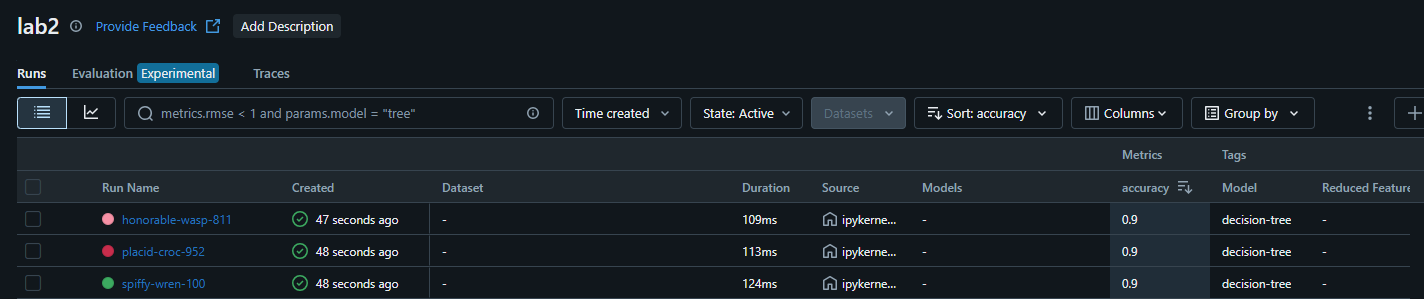

In [64]:
Image(filename='../lab2/step4.png')

## 6. Choose the **final** "best" model that you would deploy or use on future data, stage it (in MLFlow), and run it on the test set to get a final measure of performance. Don't forget to log the test set metric.

In [65]:
final_model = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=42)
final_model.fit(X_t, y_t)
final_preds = final_model.predict(X_te)
final_acc = accuracy_score(y_te, final_preds)

In [66]:
print("Run artifact URI:", mlflow.get_artifact_uri())


Run artifact URI: gs://freshmlopsbucket/mlruns /1/2d401981b6134119abfae216eeb38992/artifacts


In [67]:
mlflow.end_run()


🏃 View run clean-panda-570 at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1/runs/2d401981b6134119abfae216eeb38992
🧪 View experiment at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1


In [68]:
with mlflow.start_run(run_name="final-decision-tree-model") as run:
    mlflow.set_tags({
        "Stage": "Final Model", "Model": "decision-tree", "Train/Test Split": "80/20", "Target": "depression"})

    mlflow.log_params({"max_depth": "None","min_samples_split": 2})
    mlflow.log_metric("accuracy", final_acc)

    mlflow.sklearn.log_model(final_model, artifact_path="final_decision_tree")
    run_id = run.info.run_id
    model_uri = f"runs:/{run_id}/final_decision_tree"
    model_name = "mental-health-final-model"

    result = mlflow.register_model(model_uri=model_uri, name=model_name)

2025/04/18 10:34:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'mental-health-final-model'.
2025/04/18 10:34:23 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: mental-health-final-model, version 1
Created version '1' of model 'mental-health-final-model'.


🏃 View run final-decision-tree-model at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1/runs/c185bb65eeaf406ebd64a6938d80f79c
🧪 View experiment at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/1


In [69]:
# 🔁 Replace this with your actual Cloud Run URL
mlflow.set_tracking_uri("https://mlflow-server-152716764493.us-west2.run.app")
mlflow.set_experiment("test-connection")

with mlflow.start_run():
    mlflow.log_param("test_param", 42)
    mlflow.log_metric("test_metric", 0.987)

print("✅ Run logged!")


2025/04/18 10:34:24 INFO mlflow.tracking.fluent: Experiment with name 'test-connection' does not exist. Creating a new experiment.


🏃 View run trusting-flea-698 at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/2/runs/f8ef6086cd524392bf419524f3c154b4
🧪 View experiment at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/2
✅ Run logged!


In [70]:
mlflow.set_tracking_uri("https://mlflow-server-152716764493.us-west2.run.app")
mlflow.set_experiment("test-artifacts")

with mlflow.start_run():
    mlflow.log_param("p", 1)
    mlflow.log_metric("m", 2.0)

    # Create a dummy file to upload
    with open("output.txt", "w") as f:
        f.write("This is a test artifact.")

    mlflow.log_artifact("output.txt")


2025/04/18 10:34:26 INFO mlflow.tracking.fluent: Experiment with name 'test-artifacts' does not exist. Creating a new experiment.


🏃 View run capable-koi-33 at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/3/runs/f0ed9003dc3342e99339806b2d983dc0
🧪 View experiment at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/3


In [71]:
from mlflow.tracking import MlflowClient

client = MlflowClient()
experiment = client.get_experiment_by_name("test-artifacts")
runs = client.search_runs([experiment.experiment_id])

for run in runs:
    print("Run ID:", run.info.run_id)
    print("Artifact URI:", run.info.artifact_uri)


Run ID: f0ed9003dc3342e99339806b2d983dc0
Artifact URI: gs://freshmlopsbucket/mlruns /3/f0ed9003dc3342e99339806b2d983dc0/artifacts


In [72]:
mlflow.set_tracking_uri("https://mlflow-server-152716764493.us-west2.run.app")
mlflow.set_experiment("test-final")

with mlflow.start_run():
    mlflow.log_param("p", 42)
    mlflow.log_metric("score", 0.98)

    with open("artifact.txt", "w") as f:
        f.write("this better show up in GCS 😤")

    mlflow.log_artifact("artifact.txt")


2025/04/18 10:34:34 INFO mlflow.tracking.fluent: Experiment with name 'test-final' does not exist. Creating a new experiment.


🏃 View run incongruous-hog-469 at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/4/runs/543d2241660a43ae8f6bb9cbb56f25e2
🧪 View experiment at: https://mlflow-server-152716764493.us-west2.run.app/#/experiments/4


In [73]:
client = MlflowClient()
exp = client.get_experiment_by_name("test-final")
runs = client.search_runs([exp.experiment_id])
for r in runs:
    print("Run ID:", r.info.run_id)
    print("Artifact URI:", r.info.artifact_uri)


Run ID: 543d2241660a43ae8f6bb9cbb56f25e2
Artifact URI: gs://freshmlopsbucket/mlruns /4/543d2241660a43ae8f6bb9cbb56f25e2/artifacts
